# Processing Board Game Data

## Background

This dataset comes from the [Board Game Geek database](http://boardgamegeek.com/). The site's database has more than 90,000 games, with crowd-sourced ratings. This particular subset is limited to only games with at least 50 ratings which were published between 1950 and 2016. This still leaves us with 10,532 games! For more information please check out the [tidytuesday repo](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-03-12) which is where this example was taken from.



## Data Cleaning

In [2]:
import pandas as pd
import janitor
import os

### One-Shot
This cell demonstrates the cleaning process using the call chaining approach championed in pyjanitor

In [3]:
cleaned_df = (
    pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-12//board_games.csv") # ingest raw data
    .clean_names() # removes whitespace, punctuation/symbols, capitalization
    .remove_empty() # removes entirely empty rows / columns
    .drop(columns = ["image","thumbnail","compilation","game_id"]) # drops unnecessary columns
)

## Multi-Step
These cells repeat the process in a step-by-step manner in order to explain it in more detail

### Read in the csv

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-12/board_games.csv")
df.head(3)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019


### Remove the whitespace, punctuation/symbols, and capitalization  form columns

In [5]:
df = df.clean_names() 
df.head(3)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019


### Remove all the empty rows and columns if present

In [6]:
df = df.remove_empty()
df.head(3)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019


### Check to see whether "min_playtime" and "max_playtime" columns are equal

In [7]:
len(df[df["min_playtime"] != df["max_playtime"]])

1565

### Check to see what percentage of the values in the "compilation" column are not null

In [8]:
len(df[df['compilation'].notnull()]) / len(df)

0.03892897835169009

### Drop unnecessary columns
The 'compilation' column was demonstrated to have little value, the "image" and "thumbnail" columns 
link to images and are not a factor in this analysis. The "game_id" column can be replaced by using the index.

In [9]:
df = df.drop(columns=["image", "thumbnail", "compilation", "game_id"])
df.head(3)

,description,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,year_published,artist,category,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,Die Macher is a game about seven sequential po...,5,240,14,3,240,Die Macher,240,1986,Marcus Gschwendtner,"Economic,Negotiation,Political",Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,Dragonmaster is a trick-taking card game based...,4,30,12,3,30,Dragonmaster,30,1981,Bob Pepper,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,"Part of the Knizia tile-laying trilogy, Samura...",4,60,10,2,30,Samurai,60,1998,Franz Vohwinkel,"Abstract Strategy,Medieval",Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019


## Sample Analysis

In [10]:
import operator
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# allow plots to appear directly in the notebook
%matplotlib inline

In [11]:
df['category'].head(10)

0    Economic,Negotiation,Political
1                 Card Game,Fantasy
2        Abstract Strategy,Medieval
3                           Ancient
4                          Economic
5             Civilization,Nautical
6                 Abstract Strategy
7              Civilization,Fantasy
8                       Exploration
9                    Fantasy,Travel
Name: category, dtype: object

In [12]:
# gives us the top ten game categories that show up in the "category" column
from collections import Counter

Counter(df['category']).most_common(10)

[('Wargame,World War II', 449),
 ('Card Game', 438),
 ('Abstract Strategy', 284),
 ('Napoleonic,Wargame', 124),
 ('Economic', 116),
 ('Card Game,Fantasy', 110),
 ('Dice', 107),
 ('American Civil War,Wargame', 97),
 (nan, 94),
 ('Modern Warfare,Wargame', 89)]

In [13]:
df.columns

Index(['description', 'max_players', 'max_playtime', 'min_age', 'min_players',
       'min_playtime', 'name', 'playing_time', 'year_published', 'artist',
       'category', 'designer', 'expansion', 'family', 'mechanic', 'publisher',
       'average_rating', 'users_rated'],
      dtype='object')

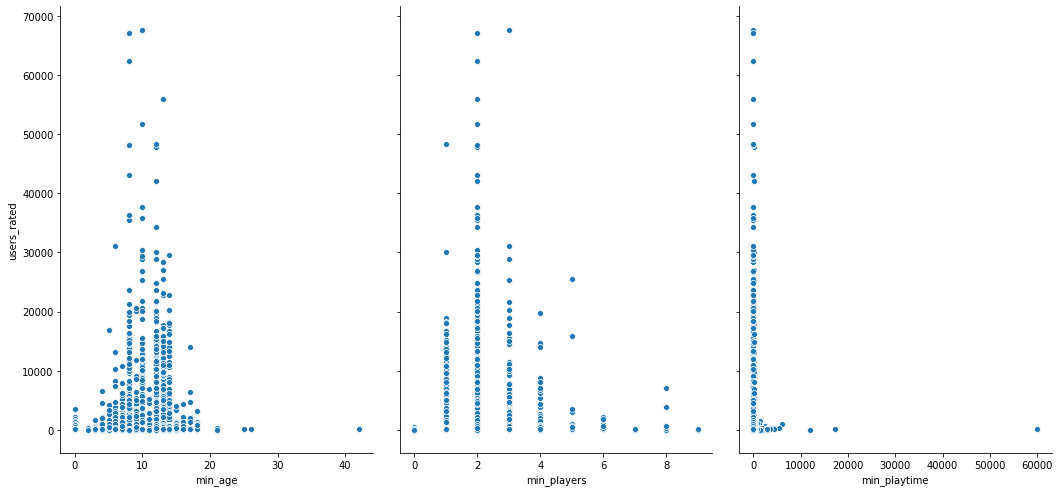

In [16]:
sns.pairplot(df, x_vars=['min_age', 'min_players', 'min_playtime'], y_vars='users_rated', size=7, aspect=0.7);

### Preliminary analysis
Without digging into the data too much more it becomes apparent that there are some entries that were improperly entered e.g. having a minimum playtime of 60000 minutes. Otherwise we see some nice bell curves. 